# Семинар 5.
#  Распределение p-values, ошибки I и II рода. Множественное тестирование гипотез

## Теория 
Ошибки первого и второго рода — два типа ошибок, которые могут возникать при проверке статистических гипотез.

| Тип ошибки      | Обозначение    | 	Что происходит | Последствие                        |
|--------------------|----------------|-------------|------------------------------------|
| Ошибка I рода       | $\alpha_I$     | 	Нулевая гипотеза отвергается, хотя она верна        | Ложное срабатывание критерия       |
| Ошибка II рода | 	$\alpha_{II}$ | Нулевая гипотеза не отвергается, хотя она ложна        | 	Пропущенное срабатывание критерия |



![Мэм](images/s5-1.png)

---

## Наглядный пример

### 1. Модель

$\xi: (0.2, 1, -1, -2)$

### 2. Гипотеза

$H_0: \mathbb{E}\xi = 1$

$H_1: \mathbb{E}\xi \neq 1$

### 3. Уровень значимости

$\alpha$ = 0.05

### 4. Выбор статистического критерия

Выберем в качестве статистического критерия будем использовать t-тест Стьюдента:

$t = \sqrt{n} \cdot \frac{\overline{X} - \mu_0}{s}$

где:

$\overline{X}$ — выборочное среднее,

$\mu_0 = 1$ — гипотетическое среднее,

$s$ — выборочное стандартное отклонение,

$n$ — размер выборки

### 5. Вычисление статистики критерия

Ошибка I рода \alpha_{I} — это фиксированное значение $\alpha$, так как по определению выше
это вероятность ошибочного отклонения $H_0$, если она на самом деле верна.

$\overline{X} = -0.45$ 

$s = 1.32$ 

$n = 4$

$\mu_0 = 1$ 

$t = \frac{2 \cdot (-0.45 - 1)}{1.32} = −2.196$

Известно распределение статистик такого критерия:
$T: \sim t(n-1)$

### 6. Определение критической области

Для двустороннего t-теста при $\alpha$ = 0.05 и $df=n−1=3$ степенями свободы, критические значения t берутся из таблицы Стьюдента:

$t_{crit} = \pm 3.182$

Или тут
https://planetcalc.ru/5019/

### 7. Принятие решения

p-value (двусторонний тест):

(Берем P по функции распределения с нашими параметрами)

https://planetcalc.ru/5019/


$p = 2 \cdot P(T > | t |) = 2 ⋅ (1− P(T < 2.196)) \approx 0.116$

Поскольку 

- |t| = 2.196 < 3.182, t-статистика не попадает в критическую область -> $H_0$ не отвергается
- p-значение (0.116) больше 0.05 -> недостаточно оснований для отклонения $H_0$


### 8. Альтернативная гипотеза

Ошибка второго рода — это вероятность не попасть в критическую область, если $H_1$ верна.

Чтобы её посчитать, мы должны предположить, что истинное математическое ожидание не 1, а, например, $\mu_1 = 0.45$ — среднее, полученное из выборки.

Тогда считаем вероятность, что наблюдаемое значение не попадает в критическую область t-теста при
$\mu=−0.45$.

#### Отличия при проверке гипотез
##### Проверка при $\alpha_I$
В классическом t-тесте мы проверяем гипотезу $H_0: \mu = \mu_0$.

Здесь $T$ подчиняется обычному t-распределению.

##### Проверка при $\alpha_{II}$
При ошибке II рода мы предполагаем, что $\mu \neq \mu_0$, например $\mu \neq \mu_1$.

В этом случае наша t-статистика больше не подчиняется обычному t-распределению, потому что математическое ожидание
$\mathbf{E}\xi$ изменилось — теперь у нас появляется смещение ($\lambda \neq 0$).

$\lambda = \sqrt{n} \cdot \frac{\mu_1 - \mu_0}{s}$

Из-за этого распределение: $T \sim t_{df = 3} (\lambda)$ (нецентральное t-распределение).

#### Расчеты

$\lambda = \frac{2 \cdot (-0.45 - 1)}{1.32} = −2.196$.

$\alpha_{II} = \mathbf{P}(−3.182 < T < 3.182)$

$T \sim t_{df=3} (\lambda=−2.197)$.

Теперь рассчитаем это численно (вручную — сложно, но в Python легко):

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

In [7]:
df = 3
lambda_ = -2.197
t_crit = 3.182

# ошибка второго рода = вероятность, что t не попадает в критическую область
beta = stats.nct.cdf(t_crit, df, lambda_) - stats.nct.cdf(-t_crit, df, lambda_)

print(f"Ошибка II рода (alpha_II): {beta:.4f}")

Ошибка II рода (alpha_II): 0.6657


Это вероятность ошибки второго рода — то есть шанс, что мы не отвергнем нулевую гипотезу, хотя она на самом деле ложна.

$\alpha_{II}$ = 0.6657 означает, что с вероятностью ~66% мы не заметим, что среднее не равно 1, и ошибочно не отвергнем H_0.

Представим, что мы много раз повторяем эксперимент с истинным средним:
- В 34% случаев t-тест правильно отклонит H_0
- В 66% случаев t-тест не заметит разницы и скажет: "Ну, вроде μ=1" — ошибка второго рода

Чем меньше $\alpha$, тем лучше тест распознаёт ложные / альтернативные гипотезы. Поэтому величину $1 - \alpha_{II}$ называют мощностью критерия против альтернативы и обозначают $\beta$.

Низкий $\alpha_{II}$ может быть следствием:

- малого объёма выборки (всего 4 значения)
- большой дисперсии данных
- слабого смещения $\mu_1$ от $\mu_0$





| Результат применения критерия | Верная гипотеза H0                         | Верная гипотеза H1                             |
|-------------------------------|--------------------------------------------|------------------------------------------------|
| **H0**                        | ✅ H0 верно не отвергнута                   | ❌ H0 неверно не отвергнута (**$\alpha_{II}$**) |
| **H1**                        | ❌ H0 неверно отвергнута (**$\alpha_{I}$**) | ✅ H0 верно отвергнута ($\beta$)                |



# Как узнать качество критерия

$\alpha_{I} = \alpha$ — точный критерий

$\alpha_{I} < \alpha$ — консервативный критерий

$\alpha_{I} > \alpha$ — радикальный критерий

#### P.S.

$\alpha_{I} \to \alpha$, при $n \to \infty$ — асимптотический критерий

#### Распределение p-value

- P-value можно рассматривать, как случайную величину: $p = p(x_1, \dots , x_n)$
- Если H0 верна, то p-value равномерно распределено на [0, 1]

![Консервативные и радикальные критерии](images/s5-2.png)

# Критерий Стьюдента для независимых выборок


$H_0: \mathbb{E}\xi_1 = \mathbb{E}\xi_2$


$H_1: \mathbb{E}\xi_1 \neq \mathbb{E}\xi_2$

1. Данные в каждой выборке должны быть нормально распределены
2. Дисперсии двух выборок должны быть равными

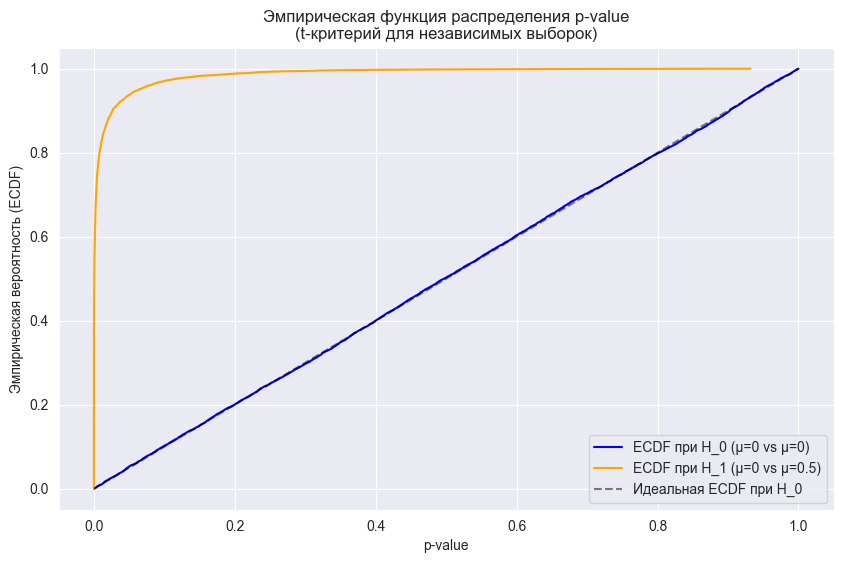

In [8]:
# Параметры
n_simulations = 10000
sample_size = 100

def ecdf(data):
    """Строит точки ECDF: значения и соответствующие вероятности"""
    x = np.sort(data)
    y = np.arange(1, len(data)+1) / len(data)
    return x, y

# Сбор p-value при H₀ (одинаковые распределения)
p_values_h0 = [
    ttest_ind(
        np.random.normal(0, 1, sample_size),
        np.random.normal(0, 1, sample_size),
        equal_var=False
    ).pvalue
    for _ in range(n_simulations)
]

# Сбор p-value при H₁ (средние различаются)
p_values_h1 = [
    ttest_ind(
        np.random.normal(0, 1, sample_size),
        np.random.normal(0.5, 1, sample_size),
        equal_var=False
    ).pvalue
    for _ in range(n_simulations)
]

# ЭФР
x_h0, y_h0 = ecdf(p_values_h0)
x_h1, y_h1 = ecdf(p_values_h1)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(x_h0, y_h0, label='ECDF при H_0 (μ=0 vs μ=0)', color='blue')
plt.plot(x_h1, y_h1, label='ECDF при H_1 (μ=0 vs μ=0.5)', color='orange')
plt.plot([0,1], [0,1], 'k--', alpha=0.5, label='Идеальная ECDF при H_0')
plt.xlabel('p-value')
plt.ylabel('Эмпирическая вероятность (ECDF)')
plt.title('Эмпирическая функция распределения p-value\n(t-критерий для независимых выборок)')
plt.legend()
plt.grid(True)
plt.show()

## U-критерий Манна-Уитни

$H_0: x, y \sim O$

$H_1: x \sim O, y \sim A$


1. Две выборки должны быть независимыми
2. Не требуется нормальность распределения
3. Выборки должны быть из распределений с одинаковой формой (т.е. без различий в дисперсиях).

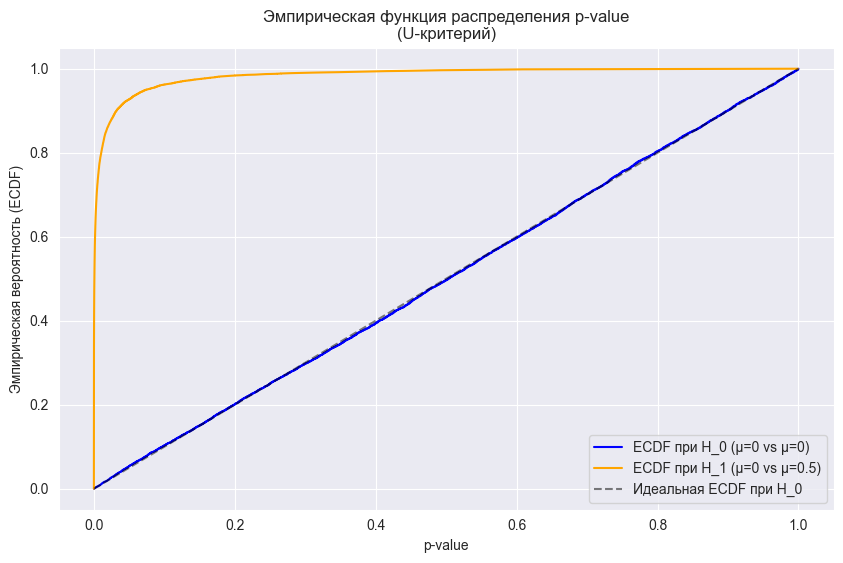

In [9]:
# Сбор p-value при H₀ (одинаковые распределения)
p_values_h0 = [
    stats.mannwhitneyu(
        np.random.normal(0, 1, sample_size),
        np.random.normal(0, 1, sample_size)
    ).pvalue
    for _ in range(n_simulations)
]

# Сбор p-value при H₁ (распределения с разными медианами)
p_values_h1 = [
    stats.mannwhitneyu(
        np.random.normal(0, 1, sample_size),
        np.random.normal(0.5, 1, sample_size)  # Сдвиг медианы
    ).pvalue
    for _ in range(n_simulations)
]

# ЭФР
x_h0, y_h0 = ecdf(p_values_h0)
x_h1, y_h1 = ecdf(p_values_h1)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(x_h0, y_h0, label='ECDF при H_0 (μ=0 vs μ=0)', color='blue')
plt.plot(x_h1, y_h1, label='ECDF при H_1 (μ=0 vs μ=0.5)', color='orange')
plt.plot([0,1], [0,1], 'k--', alpha=0.5, label='Идеальная ECDF при H_0')
plt.xlabel('p-value')
plt.ylabel('Эмпирическая вероятность (ECDF)')
plt.title('Эмпирическая функция распределения p-value\n(U-критерий)')
plt.legend()
plt.grid(True)
plt.show()

#### Зависимость мощности от альтернативной гипотезы

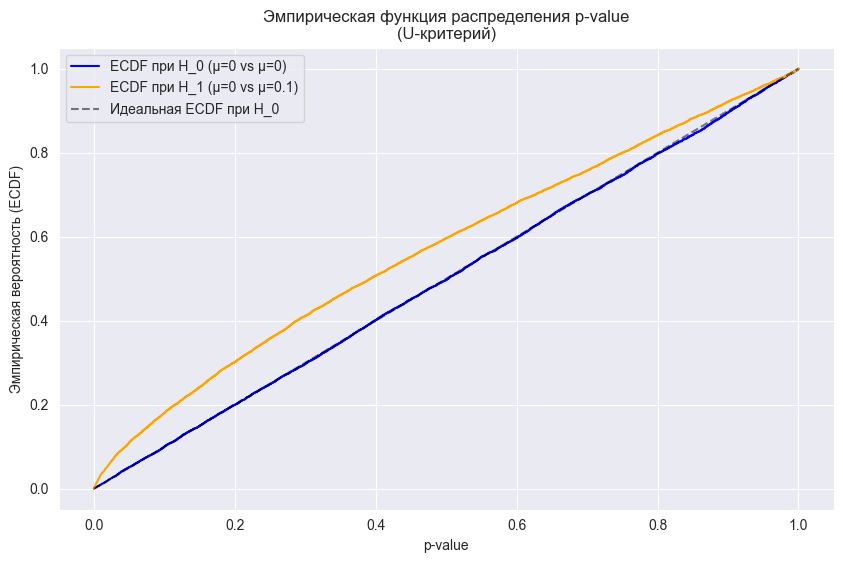

In [10]:
# Сбор p-value при H₀ (одинаковые распределения)
p_values_h0 = [
    stats.mannwhitneyu(
        np.random.normal(0, 1, sample_size),
        np.random.normal(0, 1, sample_size)
    ).pvalue
    for _ in range(n_simulations)
]

# Сбор p-value при H₁ (распределения с разными медианами)
p_values_h1 = [
    stats.mannwhitneyu(
        np.random.normal(0, 1, sample_size),
        np.random.normal(0.1, 1, sample_size)  # Уменьшаем сдвиг медианы
    ).pvalue
    for _ in range(n_simulations)
]

# ЭФР
x_h0, y_h0 = ecdf(p_values_h0)
x_h1, y_h1 = ecdf(p_values_h1)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(x_h0, y_h0, label='ECDF при H_0 (μ=0 vs μ=0)', color='blue')
plt.plot(x_h1, y_h1, label='ECDF при H_1 (μ=0 vs μ=0.1)', color='orange')
plt.plot([0,1], [0,1], 'k--', alpha=0.5, label='Идеальная ECDF при H_0')
plt.xlabel('p-value')
plt.ylabel('Эмпирическая вероятность (ECDF)')
plt.title('Эмпирическая функция распределения p-value\n(U-критерий)')
plt.legend()
plt.grid(True)
plt.show()

## Критерий Колмогорова-Смирнова (KS-тест)

$H_0$: Оба распределения принадлежат одной и той же генеральной совокупности

$H_1$: Распределения различаются

1. Две выборки должны быть независимыми
2. Не требуется нормальность распределения

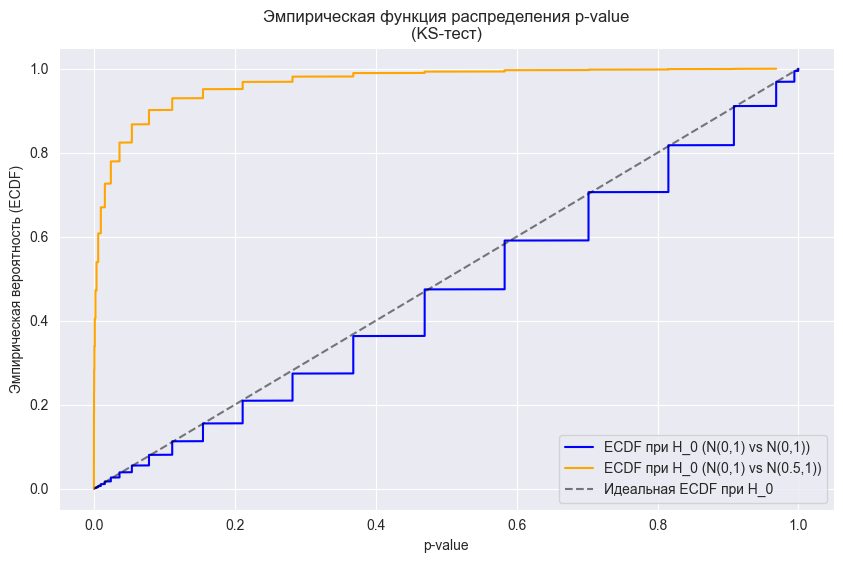

In [11]:
# Сбор p-value при H₀ (одинаковые распределения)
p_values_h0 = [
    stats.ks_2samp(
        np.random.normal(0, 1, sample_size),
        np.random.normal(0, 1, sample_size)
    ).pvalue
    for _ in range(n_simulations)
]

# Сбор p-value при H₁ (разные распределения)
p_values_h1 = [
    stats.ks_2samp(
        np.random.normal(0, 1, sample_size),
        np.random.normal(0.5, 1, sample_size)  # Сдвиг распределений
    ).pvalue
    for _ in range(n_simulations)
]

# ЭФР
x_h0, y_h0 = ecdf(p_values_h0)
x_h1, y_h1 = ecdf(p_values_h1)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(x_h0, y_h0, label='ECDF при H_0 (N(0,1) vs N(0,1))', color='blue')
plt.plot(x_h1, y_h1, label='ECDF при H_0 (N(0,1) vs N(0.5,1))', color='orange')
plt.plot([0,1], [0,1], 'k--', alpha=0.5, label='Идеальная ECDF при H_0')
plt.xlabel('p-value')
plt.ylabel('Эмпирическая вероятность (ECDF)')
plt.title('Эмпирическая функция распределения p-value\n(KS-тест)')
plt.legend()
plt.grid(True)
plt.show()

# Критерий ANOVA

Этот критерий используется для сравнения средних значений более чем двух групп.
Аналог t-критерия, но для нескольких групп.

$H_0$: Средние значения всех групп равны.

$H_1$: Хотя бы одна из групп отличается.



1. Группы должны быть независимыми.

2. Данные в каждой группе должны быть нормально распределены.

3. Дисперсии в группах должны быть примерно равными.

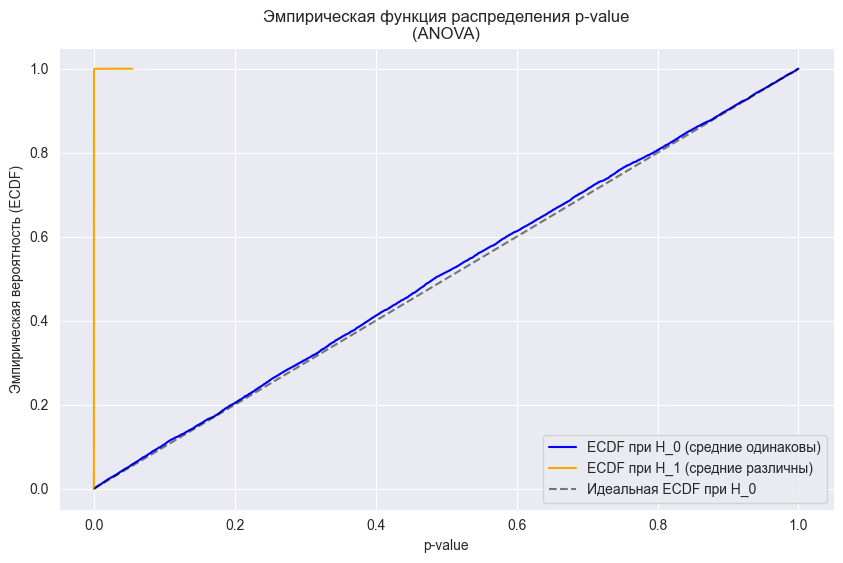

In [12]:
n_groups = 3  # Количество групп

# Сбор p-value при H₀ (одинаковые средние)
p_values_h0 = [
    stats.f_oneway(
        np.random.normal(0, 1, sample_size),
        np.random.normal(0, 1, sample_size),
        np.random.normal(0, 1, sample_size)
    ).pvalue
    for _ in range(n_simulations)
]

# Сбор p-value при H₁ (разные средние)
p_values_h1 = [
    stats.f_oneway(
        np.random.normal(0, 1, sample_size),
        np.random.normal(0.5, 1, sample_size),
        np.random.normal(-0.5, 1, sample_size)  # Сдвиг среднего
    ).pvalue
    for _ in range(n_simulations)
]

# ЭФР
x_h0, y_h0 = ecdf(p_values_h0)
x_h1, y_h1 = ecdf(p_values_h1)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(x_h0, y_h0, label='ECDF при H_0 (средние одинаковы)', color='blue')
plt.plot(x_h1, y_h1, label='ECDF при H_1 (средние различны)', color='orange')
plt.plot([0,1], [0,1], 'k--', alpha=0.5, label='Идеальная ECDF при H_0')
plt.xlabel('p-value')
plt.ylabel('Эмпирическая вероятность (ECDF)')
plt.title('Эмпирическая функция распределения p-value\n(ANOVA)')
plt.legend()
plt.grid(True)
plt.show()

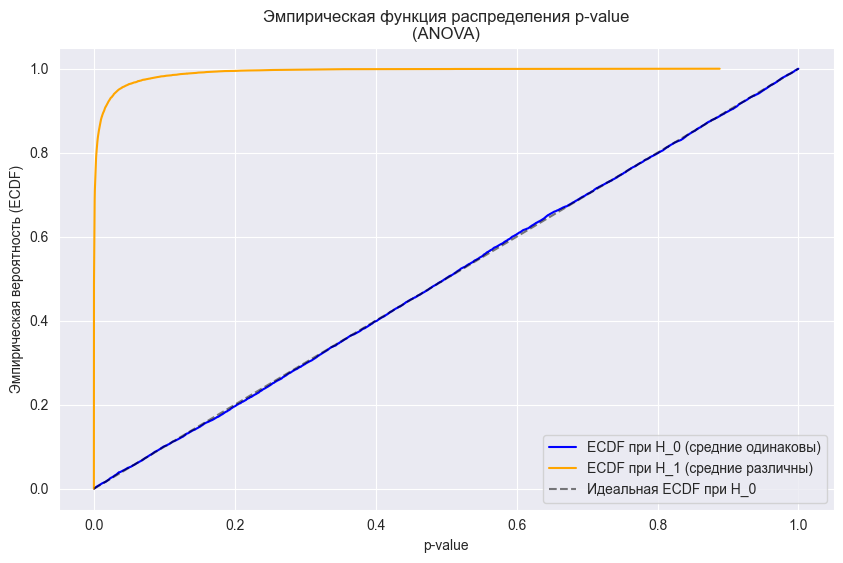

In [13]:
# Сбор p-value при H₀ (одинаковые средние)
p_values_h0 = [
    stats.f_oneway(
        np.random.normal(0, 1, sample_size),
        np.random.normal(0, 1, sample_size),
        np.random.normal(0, 1, sample_size)
    ).pvalue
    for _ in range(n_simulations)
]

# Сбор p-value при H₁ (разные средние)
p_values_h1 = [
    stats.f_oneway(
        np.random.normal(0, 1, sample_size),
        np.random.normal(0.5, 1, sample_size),
        np.random.normal(0, 1, sample_size)  # Сдвиг среднего
    ).pvalue
    for _ in range(n_simulations)
]

# ЭФР
x_h0, y_h0 = ecdf(p_values_h0)
x_h1, y_h1 = ecdf(p_values_h1)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(x_h0, y_h0, label='ECDF при H_0 (средние одинаковы)', color='blue')
plt.plot(x_h1, y_h1, label='ECDF при H_1 (средние различны)', color='orange')
plt.plot([0,1], [0,1], 'k--', alpha=0.5, label='Идеальная ECDF при H_0')
plt.xlabel('p-value')
plt.ylabel('Эмпирическая вероятность (ECDF)')
plt.title('Эмпирическая функция распределения p-value\n(ANOVA)')
plt.legend()
plt.grid(True)
plt.show()

# Тест Вилкоксона (Wilcoxon Signed-Rank Test)

Непараметрический аналог t-критерия для зависимых выборок. Используется, если сравниваем одну и ту же группу до и после воздействия (например, измерения до и после лечения).

$H_0$: Медианные значения до и после равны (изменений нет).

$H_1$: Медианные значения различаются.

Выборки должны быть зависимыми (например, измерения до/после).

Распределение разностей должно быть симметричным (но не обязательно нормальным).

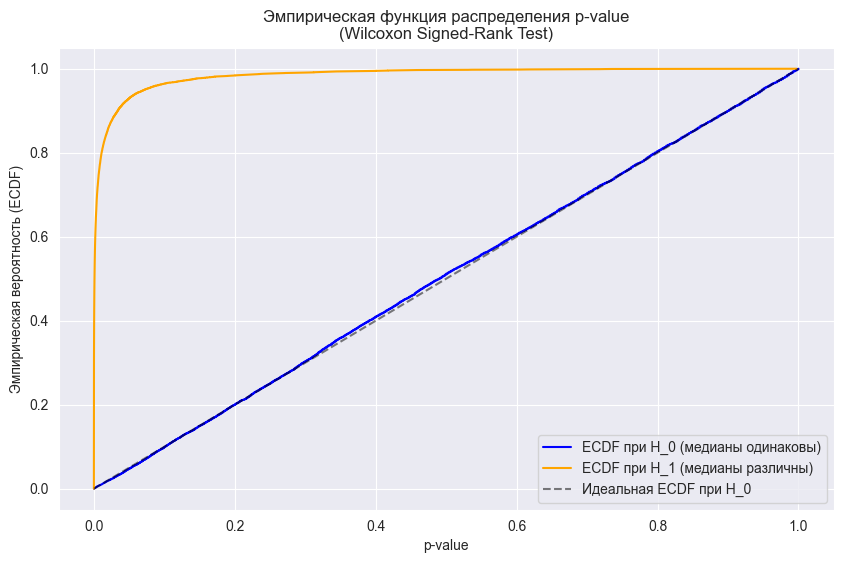

In [14]:
def ecdf(data):
    """Строит точки ECDF: значения и соответствующие вероятности"""
    x = np.sort(data)
    y = np.arange(1, len(data)+1) / len(data)
    return x, y

# Сбор p-value при H₀ (одинаковые медианы)
p_values_h0 = [
    stats.wilcoxon(
        np.random.normal(0, 1, sample_size),
        np.random.normal(0, 1, sample_size)
    ).pvalue
    for _ in range(n_simulations)
]

# Сбор p-value при H₁ (разные медианы)
p_values_h1 = [
    stats.wilcoxon(
        np.random.normal(0, 1, sample_size),
        np.random.normal(0.5, 1, sample_size)  # Сдвиг медианы
    ).pvalue
    for _ in range(n_simulations)
]

# ЭФР
x_h0, y_h0 = ecdf(p_values_h0)
x_h1, y_h1 = ecdf(p_values_h1)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(x_h0, y_h0, label='ECDF при H_0 (медианы одинаковы)', color='blue')
plt.plot(x_h1, y_h1, label='ECDF при H_1 (медианы различны)', color='orange')
plt.plot([0,1], [0,1], 'k--', alpha=0.5, label='Идеальная ECDF при H_0')
plt.xlabel('p-value')
plt.ylabel('Эмпирическая вероятность (ECDF)')
plt.title('Эмпирическая функция распределения p-value\n(Wilcoxon Signed-Rank Test)')
plt.legend()
plt.grid(True)
plt.show()


# Критерий Шапиро-Уилка

Один из самых популярных тестов на нормальность, особенно для маленьких выборок (n < 50-100).

$H_0: \xi \sim N$

$H_1: \xi \sim \overline{N}$

1. Чувствителен к выбросам
2. Плохо работает на больших выборках (n > 5000)


Можно использовать критерий Колмогорова-Смирнова, где одна из выборок будет сгенерирована из нормального распределения


# На реальных данных

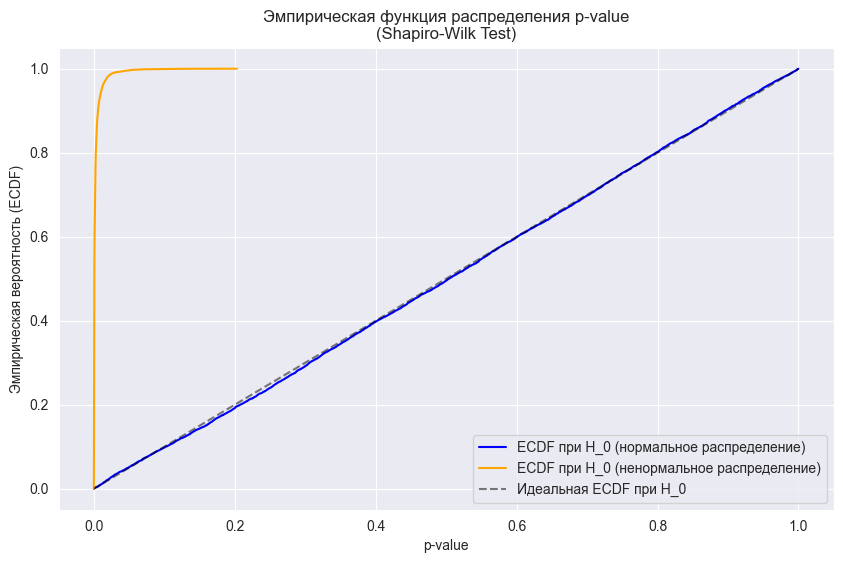

In [15]:
def ecdf(data):
    """Строит точки ECDF: значения и соответствующие вероятности"""
    x = np.sort(data)
    y = np.arange(1, len(data)+1) / len(data)
    return x, y

# Сбор p-value при H₀ (нормальное распределение)
p_values_h0 = [
    stats.shapiro(np.random.normal(0, 1, sample_size)).pvalue
    for _ in range(n_simulations)
]

# Сбор p-value при H₁ (ненормальное распределение)
p_values_h1 = [
    stats.shapiro(np.random.uniform(-1, 1, sample_size)).pvalue  # Пример ненормального распределения (равномерное)
    for _ in range(n_simulations)
]

# ЭФР
x_h0, y_h0 = ecdf(p_values_h0)
x_h1, y_h1 = ecdf(p_values_h1)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(x_h0, y_h0, label='ECDF при H_0 (нормальное распределение)', color='blue')
plt.plot(x_h1, y_h1, label='ECDF при H_0 (ненормальное распределение)', color='orange')
plt.plot([0,1], [0,1], 'k--', alpha=0.5, label='Идеальная ECDF при H_0')
plt.xlabel('p-value')
plt.ylabel('Эмпирическая вероятность (ECDF)')
plt.title('Эмпирическая функция распределения p-value\n(Shapiro-Wilk Test)')
plt.legend()
plt.grid(True)
plt.show()


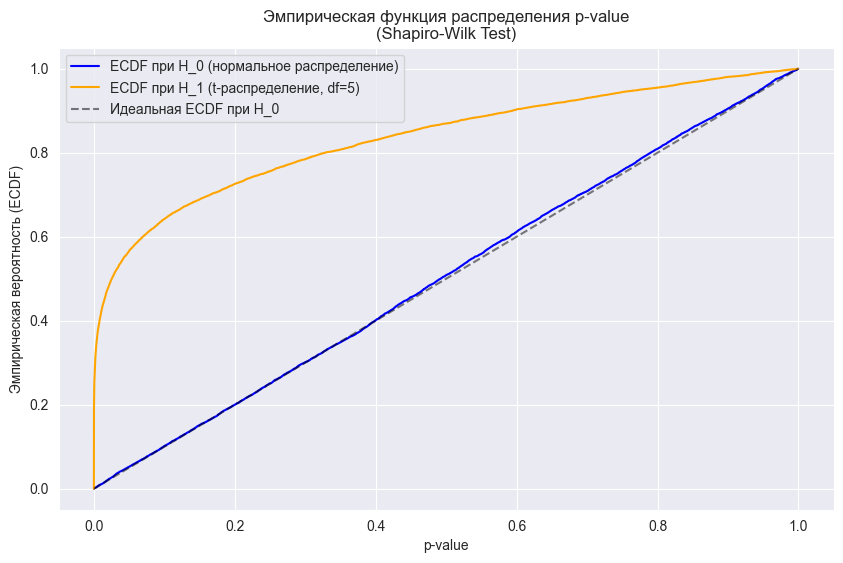

In [16]:
df = 5  # Степени свободы для t-распределения

def ecdf(data):
    """Строит точки ECDF: значения и соответствующие вероятности"""
    x = np.sort(data)
    y = np.arange(1, len(data)+1) / len(data)
    return x, y

# Сбор p-value при H₀ (нормальное распределение)
p_values_h0 = [
    stats.shapiro(np.random.normal(0, 1, sample_size)).pvalue
    for _ in range(n_simulations)
]

# Сбор p-value при H₁ (t-распределение с 5 степенями свободы)
p_values_h1 = [
    stats.shapiro(stats.t.rvs(df, size=sample_size)).pvalue  # t-распределение с 5 степенями свободы
    for _ in range(n_simulations)
]

# ЭФР
x_h0, y_h0 = ecdf(p_values_h0)
x_h1, y_h1 = ecdf(p_values_h1)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(x_h0, y_h0, label='ECDF при H_0 (нормальное распределение)', color='blue')
plt.plot(x_h1, y_h1, label=f'ECDF при H_1 (t-распределение, df={df})', color='orange')
plt.plot([0,1], [0,1], 'k--', alpha=0.5, label='Идеальная ECDF при H_0')
plt.xlabel('p-value')
plt.ylabel('Эмпирическая вероятность (ECDF)')
plt.title('Эмпирическая функция распределения p-value\n(Shapiro-Wilk Test)')
plt.legend()
plt.grid(True)
plt.show()

# Множественное тестирование (кейс с тестом на беременность)

#### Пример: металлоискатель на входе в аэропорт


Стандартная формулировка гипотез:
$H_0$ -- эффекта нет, $H_1$ -- эффекта есть (чтобы при наличии эффекта, $H_0$ однозначно отклонялась).


In [20]:
# Параметры
n_tests = 1000  # Количество тестов
alpha = 0.05  # Уровень значимости

# Генерация данных
np.random.seed(42)
p_values = []

# Для каждого теста генерируем случайные данные и проводим t-тест
for _ in range(n_tests):
    data1 = np.random.normal(0, 1, 100)  # Нормальные данные с средним 0
    data2 = np.random.normal(0, 1, 100)  # Нормальные данные с средним 0
    t_stat, p_val = stats.ttest_ind(data1, data2)
    p_values.append(p_val)

# Применяем стандартный критерий (не поправленный)
false_positives = sum(p < alpha for p in p_values)

# Выводим результаты
print(f"Без поправки: ложных положительных = {false_positives} из {n_tests} тестов.")

Без поправки: ложных положительных = 60 из 1000 тестов.


## Почему так произошло?

![Мэм2](images/s5-3.png)

Вероятность ложно-положительных заключений сильно возрастает с увеличением числа тестов.

$P$(при построении $m$ выводов, хотя бы один из них будет неверным) = $1 - (1-a)^m$

при $m = 5$, $\alpha = 0.05, P = 0,226$.

### Поправка Бонферони
Формула: Если у нас есть $m$ гипотез, то для каждого теста применяем уровень значимости
$\alpha_{cor} = \frac{\alpha}{m}$, где $\alpha$ — это исходный уровень значимости (например, 0.05).

Метод Холма (поправка Холма — Бонферрони) -- нисходящий метод.

Без поправки: ложных положительных = 60 из 1000 тестов.
Бонферрони: ложных положительных = 0 из 1000 тестов.
Холм-Бонферрони: ложных положительных = 0 из 1000 тестов.


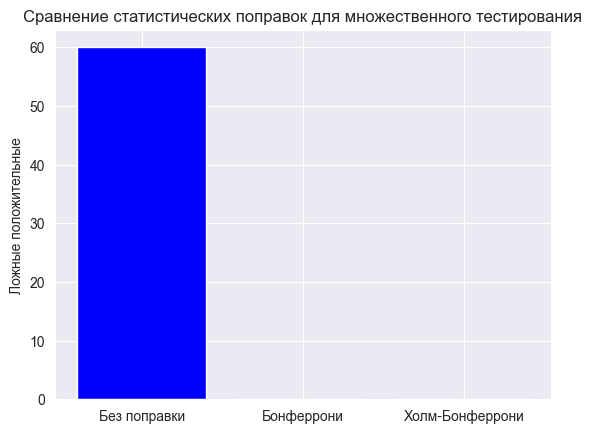

In [21]:
# Применяем поправку Бонферрони
alpha_bonferroni = alpha / n_tests
false_positives_bonferroni = sum(p < alpha_bonferroni for p in p_values)

# Применяем поправку Холма-Бонферрони
rejected, pvals_corrected, _, _ = multipletests(p_values, alpha=alpha, method='holm')
false_positives_holm = sum(rejected)

# Выводим результаты
print(f"Без поправки: ложных положительных = {false_positives} из {n_tests} тестов.")
print(f"Бонферрони: ложных положительных = {false_positives_bonferroni} из {n_tests} тестов.")
print(f"Холм-Бонферрони: ложных положительных = {false_positives_holm} из {n_tests} тестов.")

# Визуализируем результаты
labels = ['Без поправки', 'Бонферрони', 'Холм-Бонферрони']
false_positives_counts = [false_positives, false_positives_bonferroni, false_positives_holm]

plt.bar(labels, false_positives_counts, color=['blue', 'orange', 'green'])
plt.ylabel('Ложные положительные')
plt.title('Сравнение статистических поправок для множественного тестирования')
plt.show()